# Polynomial Regression from Scratch
**This notebook describes internal working of a regression model with quadratic hypothesis.**

**Earlier, I prepared a Linear Regression model via scikit-learn which directly provides a "black box" in which you fit parameters and get predictions. To feed my curiousity,I wrote this jupyter notebook.**

**Also,Implementing algorithm in vanilla python is an integral step towards strengthening fundamentals in Machine Learning :)** 


# What is polynomial Regression?
**It is a machine learning algorithm used to predict continuous values from a proportional relation equation with degree more than 1 which also differs it from Linear regression.**

**Let's start**

In [ ]:
# Here we import these necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Preparing synthetic data. 
# I used random.normal function providing mean,std_dev,size as parameters to get a random array of desired length.
# Furthur I sorted it (it will come handy later when we'll be plotting graph).
X=np.sort(np.random.normal(4,9,size=30))
Y=X*50+40*(X*X)+7

In [ ]:
# Here is Gradient descent logic ( helps finding unknown values fitting our model).
# I wrote a function so i can call it to get Gradient descent at any step.
def gradient_descent(w1,w2,b,rol):
    sm=0
    sm2=0
    sm3=0
    for i in range(len(X)):
        sm=sm+(w1*X[i]+w2*(X[i]*X[i])+b-Y[i])*(X[i])
        sm2=sm2+(w1*X[i]+w2*(X[i]*X[i])+b-Y[i])*((X[i]*X[i]))
        sm3=sm3+(w1*X[i]+w2*(X[i]*X[i])+b-Y[i])
    der_w1=(1/len(X))*sm
    der_w2=(1/len(X))*sm2
    der_b=(1/len(X))*sm3
    print(f"New value of w1 is {w1-rol*der_w1}")
    print(f"New value of w2 is {w2-rol*der_w2}")
    print(f"New value of b is {b-rol*der_b}")          
gradient_descent(49,40,6,0.001)

In [ ]:
# This is Cost function which is used to check how wrong our model is.
# It takes 3 parameters :- weight 1, weight 2, bias. 
# All forming a quadratic equation i.e w1x+w2(x**2)+b
def cost_func(w1,w2,b): 
    summation=0
    for i in range(len(X)):
        summation=summation+((w1*X[i]+w2*(X[i]*X[i])+b)-Y[i])**2
    deno=(1/(2*len(X)))
    return summation*deno  
cost_func(49.45,40,6.006203)

13.964058564705725

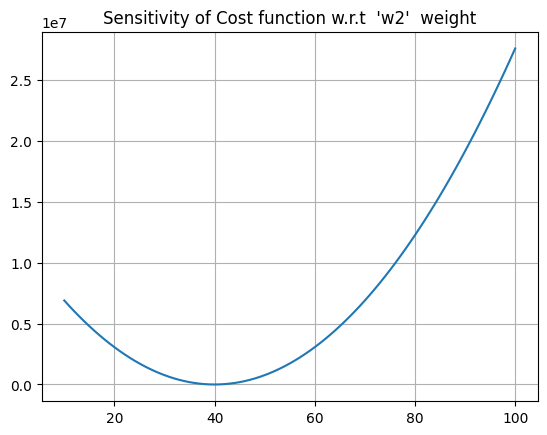

In [ ]:
# Here is a visual representation of how much weight 2 (Highest power variable's coefficient, influences predictions in case of polynomial regression.
# We made this graph keeping other variables w1 and b constant for simplicity.
w2_val=np.arange(10,101,1)
cost_func_val=[]
for i in range(91):
    cost_func_val.append(cost_func(50,w2_val[i],7))
plt.plot(w2_val,cost_func_val)
plt.title("Sensitivity of Cost function w.r.t  'w2'  weight")
plt.xlabel="w2"
plt.ylabel="Cost function"
plt.grid()

**Here we see clearly that minimum of Cost function touches only at w2=40 which is actually the accurate value of w2 in our data**

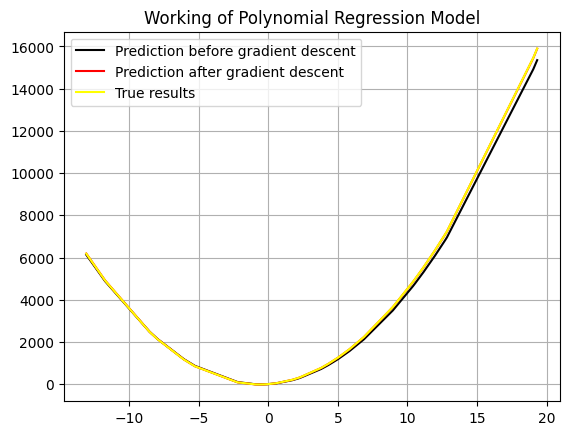

In [ ]:
#finally, the visualized result of gradient descent and cost function helping us tune our model and better the predictions

model_pred2 = 49.45 * X + 40 * (X * X) + 6.006203
model_pred1 = 40.8 * X + 39 * (X * X) + 5.7

plt.plot(X, model_pred1, color="black", label="Prediction before gradient descent")
plt.plot(X, model_pred2, color="red", label="Prediction after gradient descent")
plt.plot(X, Y, color="yellow", label="True results")
plt.title("Working of Polynomial Regression Model")
plt.legend()
plt.grid()
plt.show()

**Here red curve is not visible due to cost function being very small  (13.964058564705725)! so it is too close to yellow**

**Therefore overlapped by yellow curve. This shows improvement over black curve ( previous predictions ) deviating slightly from true curve.**

**This practice helped me to get a clearer idea how this type of popular ML algorithm regression works under the hood in commonly used libaries e.g scikit-learn.**

# THANK YOU !